# **Boombike customer demand analysis using the Linear regression**

## model is to be built to predict:
*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands



##** Data loading and understanding**

---



In [1]:
#1 reading and understanding the data

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
bike_df=pd.read_csv('day.csv')
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
#inspect various aspects of bike_df 

In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
# dropping the variables instant -> row numbers in the data , dteday-> as already we have month year and day information, casual and registred as the cnt which is the target variable is generated using these variables
bike_df.drop(['instant',	'dteday' , 'casual', 'registered'], axis = 1, inplace = True)


In [7]:
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [8]:
bike_df.shape

(730, 12)





**Visualising the data**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

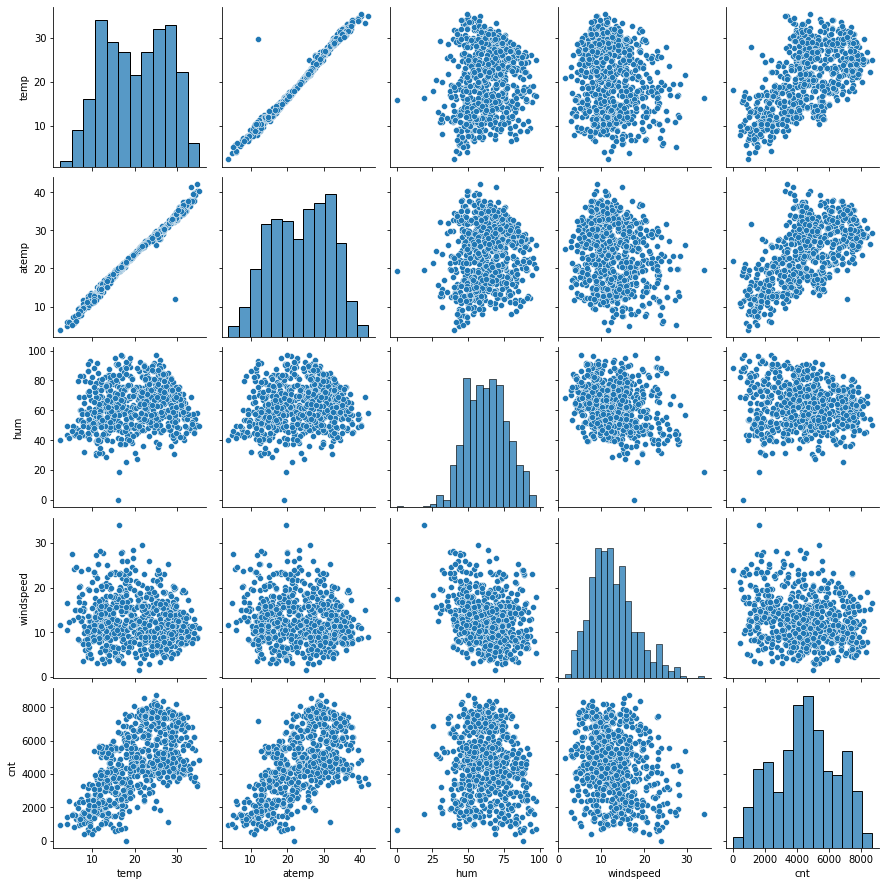

In [10]:
#visualizing the numeric columns using pairplot
#plt.figure(figsize=(10,8))
sns.pairplot(bike_df, vars=bike_df.columns[7:])
plt.show()

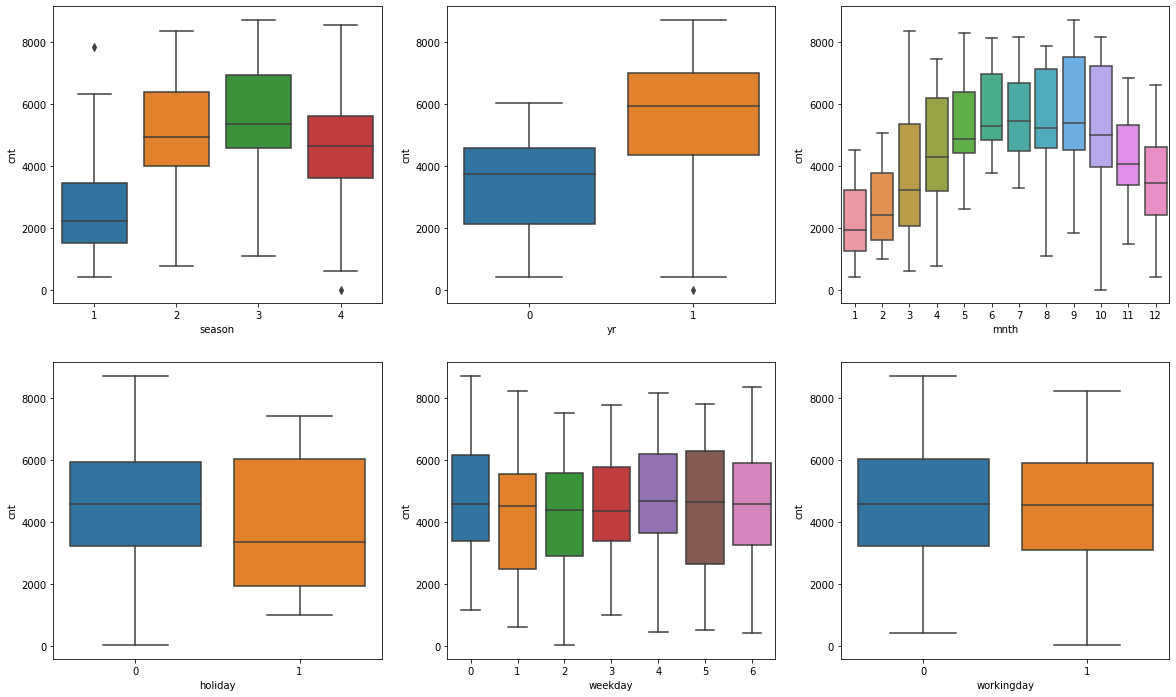

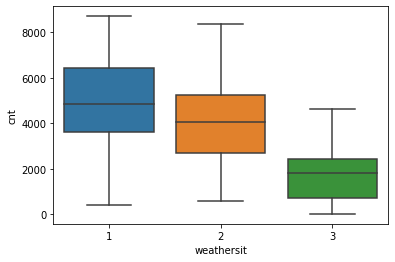

In [11]:
#visualizing the categorical columns using box-plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

**Data preparation**


*   all the categorical variables are in numerical form
*   need to create the **dummy variable** for **month**, **weekday**, **season** columns



In [12]:
month_d=pd.get_dummies(bike_df['mnth'],drop_first= True)

month_d.rename(columns = {1: 'January',2:'Februvary',3:'March',4: 'April',5:'May',6:'June', 7:'July',8:'August',9: 'September',10:'October',11:'November',12:'December'}, inplace = True)
month_d.head()
#	0	0	0	0	0	0	0	0	0	0	0 -> januavary : 1
#	1	0	0	0	0	0	0	0	0	0	0 -> Februvary : 2
#	0	1	0	0	0	0	0	0	0	0	0 -> march : 3
#	0	0	1	0	0	0	0	0	0	0	0 -> April : 4
#	0	0	0	1	0	0	0	0	0	0	0 -> May : 5
#	0	0	0	0	1	0	0	0	0	0	0 -> june: 6
#	0	0	0	0	0	1 0	0	0	0	0 -> july: 7
#	0	0	0	0	0	0	1	0	0	0	0 -> August: 8
#	0	0	0	0	0	0	0	1	0	0	0 -> September: 9
#	0	0	0	0	0	0	0	0	1	0	0 -> october: 10
#	0	0	0	0	0	0	0	0	0	1	0 -> november: 11
#	0	0	0	0	0	0	0	0	0	0	1 -> decenber: 12


Februvary  March  April  May  June  July  August  September  October  \
0          0      0      0    0     0     0       0          0        0   
1          0      0      0    0     0     0       0          0        0   
2          0      0      0    0     0     0       0          0        0   
3          0      0      0    0     0     0       0          0        0   
4          0      0      0    0     0     0       0          0        0   

   November  December  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [13]:
bike_df= pd.concat([bike_df,month_d], axis=1)
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  ...  March  April  May  June  July  August  September  \
0  18.18125  80.5833  ...      0      0    0     0     0       0          0   
1  17.68695  69.6087  ...      0      0    0     0     0       0          0   
2   9.47025  43.7273  ...      0      0    0     0     0       0          0   
3  10.60610  59.0435  ...      0      0    0     0     0       0          0   
4  11.46350  43.6957  ...      0      0    0     0     0       0          0   

   October  November  December  
0        0         0         0  
1        0         0         0  
2        0         0         0  
3        0         0         0  
4        0         0         0  

[5 rows x 23 columns]

In [14]:
season_d=pd.get_dummies(bike_df['season'], drop_first= True)
season_d.rename(columns= {1: 'spring',2:'summer',3:'fall',4:'winter'}, inplace= True)
season_d.head()

summer  fall  winter
0       0     0       0
1       0     0       0
2       0     0       0
3       0     0       0
4       0     0       0

In [15]:
bike_df= pd.concat([bike_df,season_d], axis=1)
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  ...  June  July  August  September  October  November  \
0  18.18125  80.5833  ...     0     0       0          0        0         0   
1  17.68695  69.6087  ...     0     0       0          0        0         0   
2   9.47025  43.7273  ...     0     0       0          0        0         0   
3  10.60610  59.0435  ...     0     0       0          0        0         0   
4  11.46350  43.6957  ...     0     0       0          0        0         0   

   December  summer  fall  winter  
0         0       0     0       0  
1         0       0     0       0  
2         0       0     0       0  
3         0       0     0       0  
4         0       0     0       0  

[5 rows x 26 columns]

In [16]:
weekday_d=pd.get_dummies(bike_df['weekday'], drop_first= True)
weekday_d.rename(columns= {0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}, inplace=True)
weekday_d.head()

monday  tuesday  wednesday  thursday  friday  saturday
0       1        0          0         0       0         0
1       0        1          0         0       0         0
2       0        0          1         0       0         0
3       0        0          0         1       0         0
4       0        0          0         0       1         0

In [17]:
bike_df= pd.concat([bike_df,weekday_d], axis=1)
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  ...  December  summer  fall  winter  monday  tuesday  \
0  18.18125  80.5833  ...         0       0     0       0       1        0   
1  17.68695  69.6087  ...         0       0     0       0       0        1   
2   9.47025  43.7273  ...         0       0     0       0       0        0   
3  10.60610  59.0435  ...         0       0     0       0       0        0   
4  11.46350  43.6957  ...         0       0     0       0       0        0   

   wednesday  thursday  friday  saturday  
0          0         0       0         0  
1          0         0       0         0  
2          1         0       0         0  
3          0         1       0         0  
4          0         0       1         0  

[5 rows x 32 columns]

In [18]:
# dropping, mnth, season , weekday columns since we have concatinated dummy variables for them 
bike_df.drop(['mnth', 'season' , 'weekday'], axis = 1, inplace = True)


In [19]:
weathersit_d=pd.get_dummies(bike_df['weathersit'], drop_first= True)
weathersit_d.rename(columns= {0:'weather_clear',1:'wearther_cloudy',2:'weather_light',3:'weather_sevear'}, inplace=True)
weathersit_d.head()

weather_light  weather_sevear
0              1               0
1              1               0
2              0               0
3              0               0
4              0               0

In [20]:
bike_df= pd.concat([bike_df,weathersit_d], axis=1)
bike_df.head()

yr  holiday  workingday  weathersit       temp     atemp      hum  \
0   0        0           1           2  14.110847  18.18125  80.5833   
1   0        0           1           2  14.902598  17.68695  69.6087   
2   0        0           1           1   8.050924   9.47025  43.7273   
3   0        0           1           1   8.200000  10.60610  59.0435   
4   0        0           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  Februvary  ...  fall  winter  monday  tuesday  wednesday  \
0  10.749882   985          0  ...     0       0       1        0          0   
1  16.652113   801          0  ...     0       0       0        1          0   
2  16.636703  1349          0  ...     0       0       0        0          1   
3  10.739832  1562          0  ...     0       0       0        0          0   
4  12.522300  1600          0  ...     0       0       0        0          0   

   thursday  friday  saturday  weather_light  weather_sevear  
0         0       0         0              1               0  
1         0       0         0              1               0  
2         0       0         0              0               0  
3         1       0         0              0               0  
4         0       1         0              0               0  

[5 rows x 31 columns]

In [21]:
bike_df.drop(['weathersit'], axis = 1, inplace = True)


In [22]:
bike_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Februvary  March  ...  fall  winter  monday  tuesday  wednesday  thursday  \
0          0      0  ...     0       0       1        0          0         0   
1          0      0  ...     0       0       0        1          0         0   
2          0      0  ...     0       0       0        0          1         0   
3          0      0  ...     0       0       0        0          0         1   
4          0      0  ...     0       0       0        0          0         0   

   friday  saturday  weather_light  weather_sevear  
0       0         0              1               0  
1       0         0              1               0  
2       0         0              0               0  
3       0         0              0               0  
4       1         0              0               0  

[5 rows x 30 columns]


## **splitting the data into the training and test dataset**


In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test= train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

## **Rescaling the features**

Applying the **min-max scaling** technique to **weathersit,temp,atemp,hum,windspeed,casual	, registered and cnt columns**





In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler= MinMaxScaler()

In [26]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables (and target variable)
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  Februvary  March  ...  fall  winter  monday  tuesday  \
653  0.864243          0      0  ...     0       1       0        0   
576  0.827658          0      0  ...     1       0       0        0   
426  0.465255          0      1  ...     0       0       0        0   
728  0.204096          0      0  ...     0       0       1        0   
482  0.482973          0      0  ...     0       0       0        0   

     wednesday  thursday  friday  saturday  weather_light  weather_sevear  
653          1         0       0         0              0               0  
576          1         0       0         0              0               0  
426          0         0       0         0              1               0  
728          0         0       0         0              0               0  
482          0         0       0         0              1               0  

[5 rows x 30 columns]

In [28]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt   Februvary       March  ...        fall  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.066667    0.098039  ...    0.262745   
std      0.169797    0.224593    0.249689    0.297660  ...    0.440557   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          winter      monday     tuesday   wednesday    thursday      friday  \
count  510.00000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.24902    0.154902    0.152941    0.135294    0.143137    0.147059   
std      0.43287    0.362166    0.360284    0.342373    0.350557    0.354512   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

         saturday  weather_light  weather_sevear  
count  510.000000     510.000000      510.000000  
mean     0.129412       0.343137        0.029412  
std      0.335985       0.475223        0.169124  
min      0.000000       0.000000        0.000000  
25%      0.000000       0.000000        0.000000  
50%      0.000000       0.000000        0.000000  
75%      0.000000       1.000000        0.000000  
max      1.000000       1.000000        1.000000  

[8 rows x 30 columns]

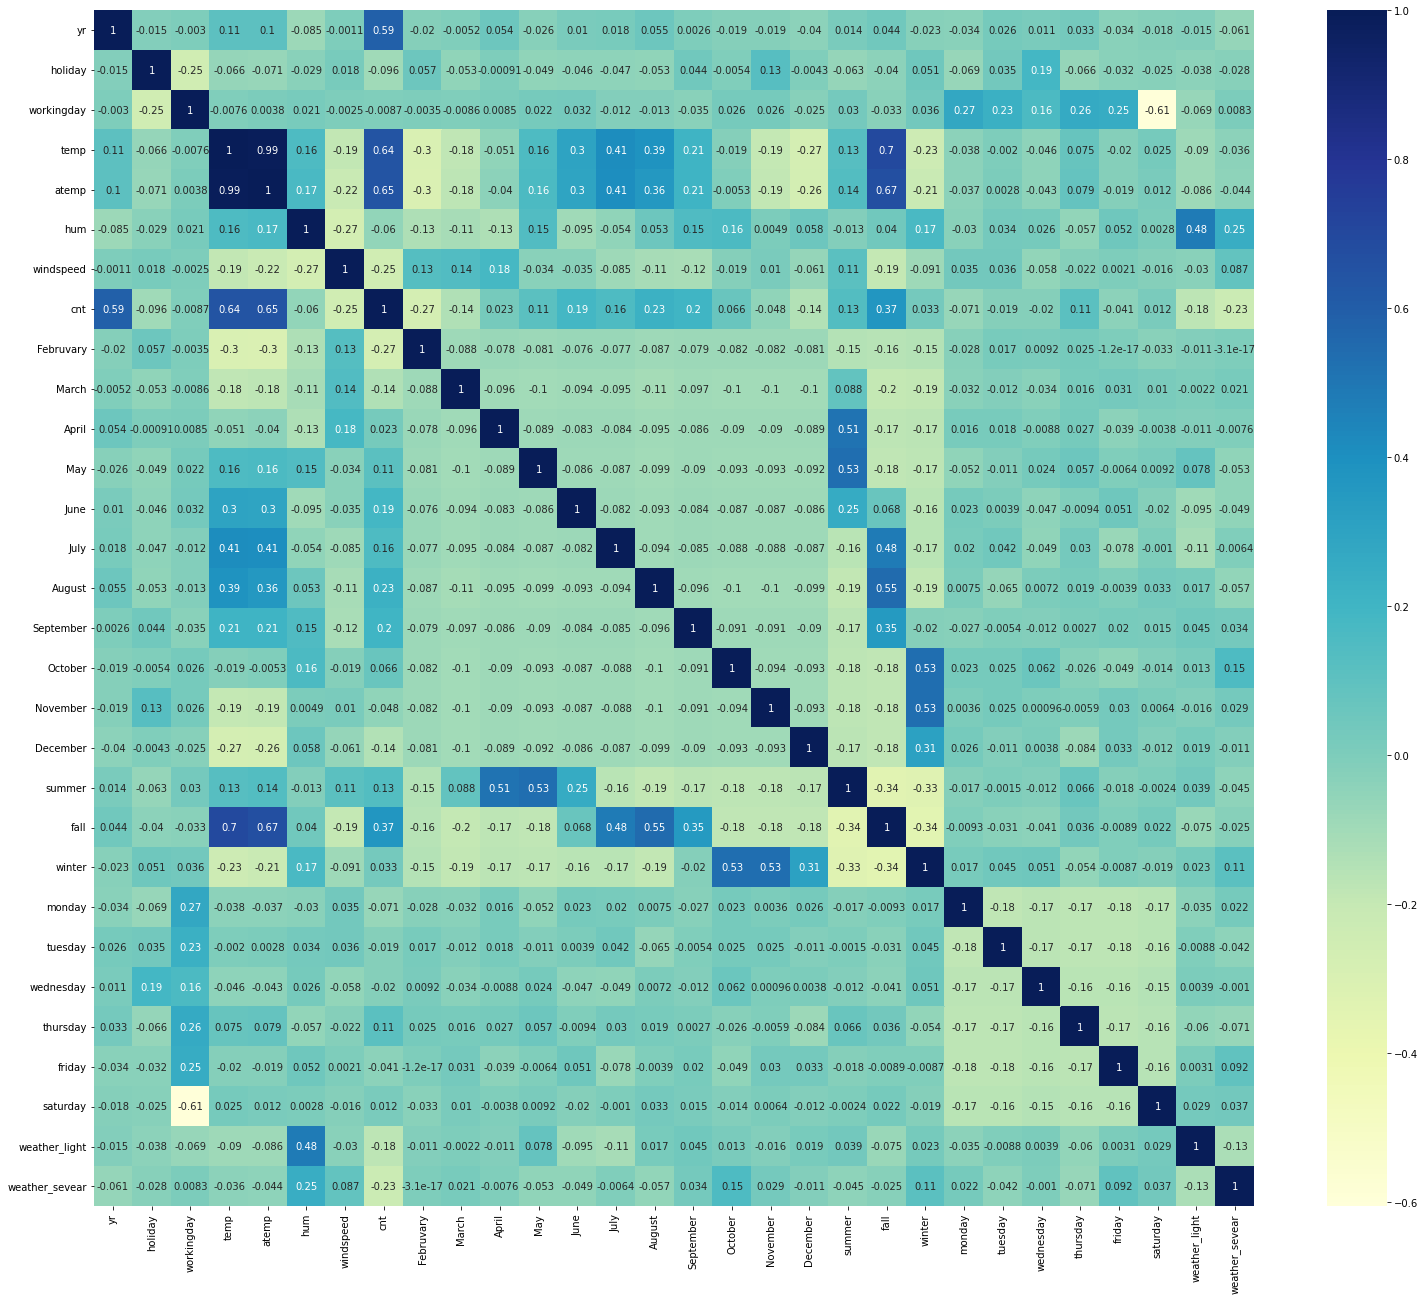

In [29]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

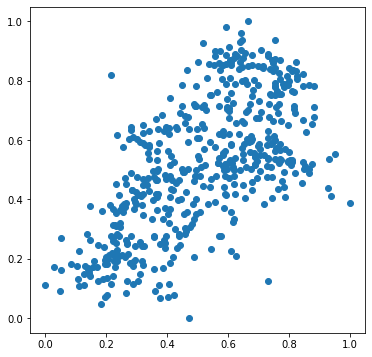

In [30]:
# as we can see the correlation between the cnt and atemp is 0.65 which is highest among all values, hence plotting pairplot betweet cnt and registered
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

## **Dividing into the x and y sets for model building**

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## **Building a linear model**

In [32]:
# building our model using the linear regression fuction from sklearn for its compatibility with ref
# ref--> recursive feature elimination

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Februvary', False, 12),
 ('March', True, 1),
 ('April', False, 3),
 ('May', False, 2),
 ('June', False, 4),
 ('July', False, 13),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 14),
 ('December', False, 15),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('monday', False, 10),
 ('tuesday', False, 11),
 ('wednesday', False, 9),
 ('thursday', False, 7),
 ('friday', False, 8),
 ('saturday', False, 16),
 ('weather_light', True, 1),
 ('weather_sevear', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'March', 'August',
       'September', 'October', 'summer', 'fall', 'winter', 'weather_light',
       'weather_sevear'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Februvary', 'April', 'May', 'June', 'July',
       'November', 'December', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday'],
      dtype='object')

In [37]:
#building the model with rfe selected variables
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          9.02e-190
Time:                        15:04:29   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2321      0.027      8.

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            const  46.85
11            fall   6.29
3             temp   3.72
10          summer   2.65
12          winter   2.34
4              hum   1.91
7           August   1.68
13   weather_light   1.56
9          October   1.52
8        September   1.40
14  weather_sevear   1.26
5        windspeed   1.20
6            March   1.17
1               yr   1.03
2          holiday   1.02

In [42]:
# fall seems insignificant infornt other variables
X_train_new = X_train_rfe.drop(["fall"], axis = 1)

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          2.26e-190
Time:                        15:04:50   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2324      0.027      8.

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            const  46.84
4              hum   1.87
11          winter   1.79
3             temp   1.62
12   weather_light   1.56
9          October   1.49
7           August   1.46
10          summer   1.38
8        September   1.25
13  weather_sevear   1.24
5        windspeed   1.19
6            March   1.12
1               yr   1.03
2          holiday   1.02

In [47]:
# March seems insignificant infornt other variables
X_train_new = X_train_new.drop(["March"], axis = 1)

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          6.02e-191
Time:                        15:05:09   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2390      0.027      8.

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            const  45.87
4              hum   1.87
10          winter   1.72
3             temp   1.59
11   weather_light   1.56
8          October   1.49
6           August   1.45
9           summer   1.38
7        September   1.24
12  weather_sevear   1.24
5        windspeed   1.18
1               yr   1.03
2          holiday   1.02

In [52]:
# October seems insignificant infornt other variables
X_train_new = X_train_new.drop(["October"], axis = 1)

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [54]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          4.43e-191
Time:                        15:05:26   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2317      0.027      8.

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            const  45.18
4              hum   1.86
10   weather_light   1.56
3             temp   1.54
6           August   1.44
8           summer   1.37
9           winter   1.32
11  weather_sevear   1.23
7        September   1.21
5        windspeed   1.18
1               yr   1.03
2          holiday   1.02

In [57]:
# check the parameters obtained
lm.params

const             0.231667
yr                0.228567
holiday          -0.095802
temp              0.539510
hum              -0.175922
windspeed        -0.183465
August            0.055338
September         0.122223
summer            0.102964
winter            0.148245
weather_light    -0.054365
weather_sevear   -0.235122
dtype: float64

**------------------------------------------------------------------------------------------------**

# **Residual analysis of the train data**

ploting the histogram to check if the error terms are normally distributed

In [58]:
y_train_bike = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

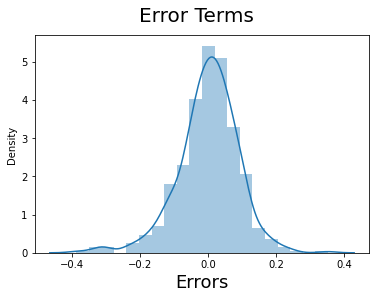

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# **Making predictions using the final model**



In [60]:
# applying scaling to x test

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt   Februvary       March  ...        fall  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.100457    0.054795  ...    0.246575   
std      0.159947    0.218435    0.301297    0.228100  ...    0.432005   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

           winter      monday     tuesday   wednesday    thursday      friday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.232877    0.118721    0.123288    0.155251    0.141553    0.132420   
std      0.423633    0.324202    0.329520    0.362974    0.349389    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         saturday  weather_light  weather_sevear  
count  219.000000     219.000000      219.000000  
mean     0.173516       0.319635        0.027397  
std      0.379560       0.467403        0.163612  
min      0.000000       0.000000        0.000000  
25%      0.000000       0.000000        0.000000  
50%      0.000000       0.000000        0.000000  
75%      0.000000       1.000000        0.000000  
max      1.000000       1.000000        1.000000  

[8 rows x 30 columns]

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_train_new.drop(['const'], axis=1, inplace= True)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [64]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test_new)

In [65]:
# making prediction using 4th model
y_pred_m4 = lm.predict(X_test_m4)

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          4.43e-191
Time:                        15:06:10   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2317      0.027      8.

# **Model evaluation**
Plotting the graph for actual and predicted values

Text(0, 0.5, 'y_pred')

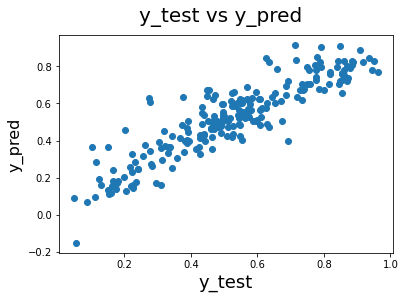

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [68]:
# r squared value
from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred_m4)
print(R2)

0.8045626124663317


In [69]:
#calculating adjusted r squared value
df_test.shape

(219, 29)

In [70]:
adj_R2=1-((1-R2)*(219-1)/(219-29-1))
print(adj_R2)

0.7745748651728058


### **Test data results**


1.   The value of R-Squared for test data is 0.8045
2.   The value of adjusted R-Squared for test data is 0.77457.



## **we can see that the equation for the best fitted line is:** 

 CNT= 0.2317 + yr * 0.2286 + holiday * -0.0958 + temp * 0.5395 + hum * -0.1759 + windspeed * -0.1835 + August            *0.0553 + September * 0.1222 + summer * 0.1030 +winter *0.1482 + weather_light * -0.0544 + weather_sevear * -0.2351  